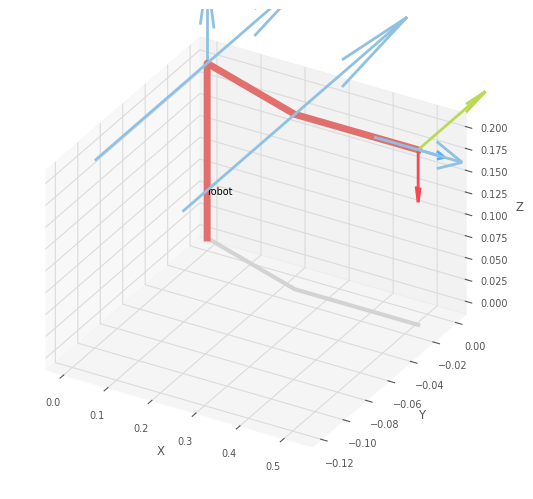

DHRobot: robot, 4 joints (RRRR), dynamics, modified DH parameters
┌──────┬────────┬───────────┬───────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │    θⱼ     │  dⱼ   │
├──────┼────────┼───────────┼───────┤
│  0.0 │   0.0° │        q1 │   0.2 │
│  0.0 │ -90.0° │  q2 - 90° │   0.0 │
│ 0.25 │   0.0° │  q3 + 90° │ -0.02 │
│  0.0 │  90.0° │        q4 │  0.28 │
└──────┴────────┴───────────┴───────┘

┌──┬──┐
└──┴──┘

   0.0007963  0         1         0.53      
   0         1         0        -0.02      
  -1         0         0.0007963  0.2004    
   0         0         0         1         



<Figure size 640x480 with 0 Axes>

In [10]:
import roboticstoolbox as rtb
from math import atan2,sqrt,cos,sin,pi
import math
import numpy as np
from spatialmath import *

l1 = 0.2   # 200 / 1000
l2 = 0.06  # 60 / 1000
l3 = 0.25  # 250 / 1000
l4 = 0.1   # 100 / 1000
l5 = 0.28  # 280 / 1000

robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=l1), 
        rtb.RevoluteMDH(alpha=-pi/2,offset=-pi/2),  
        rtb.RevoluteMDH(a=l3, d=-0.02,offset=pi/2), 
        rtb.RevoluteMDH(alpha=pi/2,d=l5) 
        
        
    ],
    name = "robot"    
)

#นำ config ที่คำนวณได้ไปพลอต
q = [0,1.57,0,0]
robot.plot(q)
print(robot)

T_0e = robot.fkine(q) 
print(T_0e) 

DHRobot: robot, 4 joints (RRRR), dynamics, modified DH parameters
┌──────┬────────┬───────────┬───────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │    θⱼ     │  dⱼ   │
├──────┼────────┼───────────┼───────┤
│  0.0 │   0.0° │        q1 │   0.2 │
│  0.0 │ -90.0° │  q2 - 90° │   0.0 │
│ 0.25 │   0.0° │  q3 + 90° │ -0.02 │
│  0.0 │  90.0° │        q4 │  0.28 │
└──────┴────────┴───────────┴───────┘

┌──┬──┐
└──┴──┘



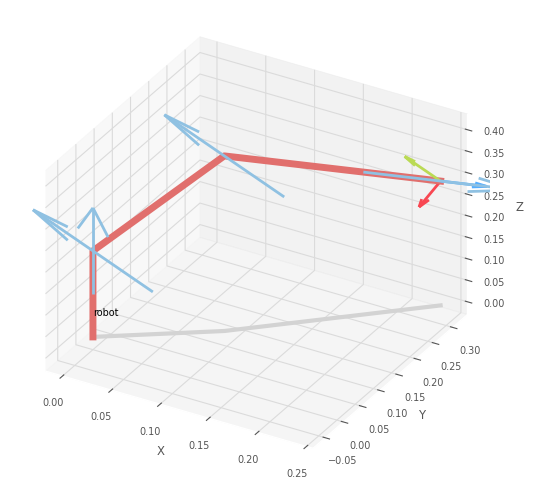

Forward Kinematics (T_0e):
  -0.2383   -0.8249    0.5126    0.2392    
  -0.3478    0.5653    0.748     0.3137    
  -0.9068    0        -0.4216    0.289     
   0         0         0         1         

Inverse Kinematics did not converge to a solution.


<Figure size 640x480 with 0 Axes>

In [148]:
import roboticstoolbox as rtb
from math import pi
import numpy as np
from spatialmath import SE3

# Define link lengths (in meters)
l1 = 0.2    # 200 mm
l2 = 0.06   # 60 mm
l3 = 0.25   # 250 mm
l4 = 0.1    # 100 mm
l5 = 0.28   # 280 mm

# Define the robot using Modified DH parameters
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=l1, alpha=0, offset=0), 
        rtb.RevoluteMDH(alpha=-pi/2, offset=-pi/2),  
        rtb.RevoluteMDH(a=l3, d=-0.02, offset=pi/2), 
        rtb.RevoluteMDH(alpha=pi/2, d=l5, offset=0) 
    ],
    name="robot"    
)

# Print robot details
print(robot)

# Define a specific joint configuration
q_initial = [0.970, 0.595, 1.411, 0]
robot.plot(q_initial)

# Compute forward kinematics for the initial configuration
T_0e = robot.fkine(q_initial)
print("Forward Kinematics (T_0e):")
print(T_0e)

# Define the desired end-effector pose
# For this example, we'll use the current pose T_0e
# In practice, you can set this to any desired SE3 pose
desired_pose = SE3(10.0, -0.02, 0.73)
# desired_pose = T_0e

# Perform Inverse Kinematics using the Levenberg-Marquardt solver
# You can also use ikine_NR for Newton-Raphson solver
solution = robot.ikine_LM(desired_pose)

# Check if the solution was successful
if solution.success:
    q_ik = solution.q
    print("Inverse Kinematics Solution:")
    print(q_ik)
    
    # Verify by computing forward kinematics of the IK solution
    T_verification = robot.fkine(q_ik)
    print("Verification Forward Kinematics (should match desired_pose):")
    print(T_verification)
    
    # Optionally, plot the robot in the IK solution configuration
    robot.plot(q_ik)
else:
    print("Inverse Kinematics did not converge to a solution.")

# Example of defining a new desired pose
# Uncomment and modify the following lines to test with a different pose
# desired_pose_new = SE3(0.3, 0.2, 0.5) * SE3.RPY(0, pi/2, 0)
# solution_new = robot.ikine_LM(desired_pose_new, q0=q_initial)
# if solution_new.success:
#     q_ik_new = solution_new.q
#     print("New IK Solution:")
#     print(q_ik_new)
#     robot.plot(q_ik_new)
# else:
#     print("Inverse Kinematics for the new pose did not converge.")
